<a href="https://colab.research.google.com/github/Sabinada/AI---Lab-work-2024/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

def vacuum_cleaner_reflex_agent(environment):

    current_location = random.choice(["A", "B"])  # Start randomly in one of the rooms

    print("Initial Environment State:", environment)
    print("Starting in Room:", current_location)

    while "Dirty" in environment.values():
        if environment[current_location] == "Dirty":
            print(f"Room {current_location} is Dirty. Cleaning...")
            environment[current_location] = "Clean"
            print(f"Room {current_location} is now Clean.")
        else:
            print(f"Room {current_location} is already Clean.")

        # Move to the next room
        current_location = "A" if current_location == "B" else "B"
        print(f"Moving to Room {current_location}...")

    print("All rooms are clean! Final Environment State:", environment)

# Example environment
example_environment = {
    "A": random.choice(["Dirty", "Clean"]),
    "B": random.choice(["Dirty", "Clean"]),
}

# Run the vacuum cleaner reflex agent
vacuum_cleaner_reflex_agent(example_environment)

Initial Environment State: {'A': 'Dirty', 'B': 'Clean'}
Starting in Room: B
Room B is already Clean.
Moving to Room A...
Room A is Dirty. Cleaning...
Room A is now Clean.
Moving to Room B...
All rooms are clean! Final Environment State: {'A': 'Clean', 'B': 'Clean'}


In [3]:
def vacuum_cleaner_model_based_agent(environment):
    # Maintain a model of the environment
    model = {room: state for room, state in environment.items()}

    current_location = random.choice(list(environment.keys()))  # Start randomly in one room

    print("Initial Environment State:", environment)
    print("Starting in Room:", current_location)

    while "Dirty" in model.values():  # Check the model to see if any room is dirty
        if model[current_location] == "Dirty":
            print(f"Room {current_location} is Dirty. Cleaning...")
            model[current_location] = "Clean"  # Update the model after cleaning
            print(f"Room {current_location} is now Clean.")
        else:
            print(f"Room {current_location} is already Clean.")

        # Find the next dirty room based on the model
        for room, state in model.items():
            if state == "Dirty":
                print(f"Moving to Room {room}...")
                current_location = room
                break  # Move to the next dirty room and stop the search

    print("All rooms are clean! Final Environment State:", model)


# Example environment
example_environment = {
    "A": random.choice(["Dirty", "Clean"]),
    "B": random.choice(["Dirty", "Clean"]),
    "C": random.choice(["Dirty", "Clean"]),
}

# Run the model-based vacuum cleaner agent
vacuum_cleaner_model_based_agent(example_environment)


Initial Environment State: {'A': 'Clean', 'B': 'Dirty', 'C': 'Dirty'}
Starting in Room: B
Room B is Dirty. Cleaning...
Room B is now Clean.
Moving to Room C...
Room C is Dirty. Cleaning...
Room C is now Clean.
All rooms are clean! Final Environment State: {'A': 'Clean', 'B': 'Clean', 'C': 'Clean'}


In [4]:
class WaterJug:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state  # (4-litre jug, 3-litre jug)
        self.goal_state = goal_state

    def goalTest(self, current_state):
        """Check if the current state matches the goal state."""
        return current_state == self.goal_state

    def successor(self, state):
        """Generate all possible successor states based on the rules."""
        successors = []
        a, b = state

        # Fill 4-litre jug
        if a < 4:
            successors.append((4, b))

        # Fill 3-litre jug
        if b < 3:
            successors.append((a, 3))

        # Empty 4-litre jug
        if a > 0:
            successors.append((0, b))

        # Empty 3-litre jug
        if b > 0:
            successors.append((a, 0))

        # Pour water from 4-litre to 3-litre jug
        transfer = min(a, 3 - b)
        if transfer > 0:
            successors.append((a - transfer, b + transfer))

        # Pour water from 3-litre to 4-litre jug
        transfer = min(b, 4 - a)
        if transfer > 0:
            successors.append((a + transfer, b - transfer))

        return successors

    def generate_path(self, closed_list, current_state):
        """Generate the path from the initial state to the goal state."""
        path = []
        while current_state is not None:
            path.append(current_state)
            current_state = closed_list[current_state]
        return path[::-1]

    def search(self, method="DFS"):
        """Search for the solution using DFS or BFS."""
        open_list = [(self.initial_state, None)]  # (state, parent)
        closed_list = {}  # state -> parent

        while open_list:
            if method == "DFS":
                current_state, parent = open_list.pop()  # DFS uses stack (LIFO)
            elif method == "BFS":
                current_state, parent = open_list.pop(0)  # BFS uses queue (FIFO)

            if current_state in closed_list:
                continue

            closed_list[current_state] = parent

            if self.goalTest(current_state):
                return self.generate_path(closed_list, current_state)

            for child_state in self.successor(current_state):
                if child_state not in closed_list:
                    open_list.append((child_state, current_state))

        return None  # No solution found

# Example usage
initial_state = (4, 0)  # 4-litre jug full, 3-litre jug empty
goal_state = (2, 0)  # 4-litre jug with 2 litres, 3-litre jug empty

water_jug = WaterJug(initial_state, goal_state)

# Test successor function
print("Testing successor function:")
print("Successors of (4, 0):", water_jug.successor((4, 0)))

# Perform DFS search
print("\nPerforming DFS:")
solution_dfs = water_jug.search(method="DFS")
print("Solution using DFS:", solution_dfs)

# Perform BFS search
print("\nPerforming BFS:")
solution_bfs = water_jug.search(method="BFS")
print("Solution using BFS:", solution_bfs)


Testing successor function:
Successors of (4, 0): [(4, 3), (0, 0), (1, 3)]

Performing DFS:
Solution using DFS: [(4, 0), (1, 3), (1, 0), (0, 1), (0, 0), (0, 3), (3, 0), (3, 3), (4, 2), (0, 2), (2, 0)]

Performing BFS:
Solution using BFS: [(4, 0), (1, 3), (1, 0), (0, 1), (4, 1), (2, 3), (2, 0)]


In [5]:
class CityMap:
    def __init__(self):
        self.graph = {}

    def add_road(self, city1, city2, distance):
        """Add a road (edge) between two cities (nodes) with a distance (weight)."""
        if city1 not in self.graph:
            self.graph[city1] = []
        if city2 not in self.graph:
            self.graph[city2] = []
        self.graph[city1].append((city2, distance))
        self.graph[city2].append((city1, distance))  # Assuming undirected graph

    def bfs(self, start, goal):
        """Perform Breadth-First Search to find the shortest path."""
        from collections import deque

        open_list = deque([(start, [start])])  # (current_city, path)
        visited = set()

        while open_list:
            current_city, path = open_list.popleft()

            if current_city in visited:
                continue

            visited.add(current_city)

            if current_city == goal:
                return path

            for neighbor, _ in self.graph.get(current_city, []):
                if neighbor not in visited:
                    open_list.append((neighbor, path + [neighbor]))

        return None  # No path found

    def dfs(self, start, goal):
        """Perform Depth-First Search to find a path."""
        open_list = [(start, [start])]  # (current_city, path)
        visited = set()

        while open_list:
            current_city, path = open_list.pop()

            if current_city in visited:
                continue

            visited.add(current_city)

            if current_city == goal:
                return path

            for neighbor, _ in self.graph.get(current_city, []):
                if neighbor not in visited:
                    open_list.append((neighbor, path + [neighbor]))

        return None  # No path found

# Example usage
city_map = CityMap()

# Add roads (edges)
city_map.add_road("A", "B", 5)
city_map.add_road("A", "C", 10)
city_map.add_road("B", "D", 8)
city_map.add_road("C", "D", 2)
city_map.add_road("B", "E", 7)
city_map.add_road("D", "E", 3)

# Perform BFS
print("Performing BFS:")
path_bfs = city_map.bfs("A", "E")
print("BFS Path:", path_bfs)

# Perform DFS
print("\nPerforming DFS:")
path_dfs = city_map.dfs("A", "E")
print("DFS Path:", path_dfs)

Performing BFS:
BFS Path: ['A', 'B', 'E']

Performing DFS:
DFS Path: ['A', 'C', 'D', 'E']


In [6]:
class BlocksWorld:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state  # Dictionary of blocks and their support
        self.goal_state = goal_state        # Dictionary of blocks and their goal support

    def calculate_heuristic(self, state):
        """Calculate the heuristic value of the given state."""
        heuristic = 0
        for block, support in state.items():
            if block in self.goal_state:
                if support == self.goal_state[block]:
                    # Correct support structure
                    heuristic += len(self.get_support_chain(state, block))
                else:
                    # Wrong support structure
                    heuristic -= len(self.get_support_chain(state, block))
        return heuristic

    def get_support_chain(self, state, block):
        """Get the chain of blocks supported by the given block."""
        chain = []
        current = block
        while current in state and state[current] is not None:
            chain.append(current)
            current = state[current]
        return chain

# Example usage
initial_state = {
    "A": "Table",  # A is on the Table
    "B": "A",      # B is on A
    "C": "Table",  # C is on the Table
    "D": "C"       # D is on C
}

goal_state = {
    "A": "Table",  # A should be on the Table
    "B": "A",      # B should be on A
    "C": "B",      # C should be on B
    "D": "C"       # D should be on C
}

blocks_world = BlocksWorld(initial_state, goal_state)
heuristic = blocks_world.calculate_heuristic(initial_state)
print("Heuristic Value of Initial State:", heuristic)

Heuristic Value of Initial State: 4


In [7]:
class BlocksWorld:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state  # Dictionary of blocks and their support
        self.goal_state = goal_state        # Dictionary of blocks and their goal support

    def calculate_heuristic(self, state):
        """Calculate the heuristic value of the given state."""
        heuristic = 0
        for block, support in state.items():
            if block in self.goal_state:
                if support == self.goal_state[block]:
                    # Correct support structure
                    heuristic += len(self.get_support_chain(state, block))
                else:
                    # Wrong support structure
                    heuristic -= len(self.get_support_chain(state, block))
        return heuristic

    def get_support_chain(self, state, block):
        """Get the chain of blocks supported by the given block."""
        chain = []
        current = block
        while current in state and state[current] is not None:
            chain.append(current)
            current = state[current]
        return chain

# Tic-Tac-Toe Heuristic Calculation
class TicTacToe:
    def __init__(self, board, player, opponent):
        self.board = board  # 3x3 matrix representing the game state
        self.player = player  # Player's mark (e.g., 'X')
        self.opponent = opponent  # Opponent's mark (e.g., 'O')

    def calculate_heuristic(self):
        """Calculate the heuristic value e(p) for the current board."""
        player_open = self.count_open_lines(self.player)
        opponent_open = self.count_open_lines(self.opponent)
        return player_open - opponent_open

    def count_open_lines(self, mark):
        """Count rows, columns, and diagonals open for the given mark."""
        open_lines = 0

        # Check rows
        for row in self.board:
            if all(cell in (mark, None) for cell in row):
                open_lines += 1

        # Check columns
        for col in range(3):
            if all(row[col] in (mark, None) for row in self.board):
                open_lines += 1

        # Check diagonals
        if all(self.board[i][i] in (mark, None) for i in range(3)):
            open_lines += 1
        if all(self.board[i][2 - i] in (mark, None) for i in range(3)):
            open_lines += 1

        return open_lines

# Example usage for BlocksWorld
initial_state = {
    "A": "Table",  # A is on the Table
    "B": "A",      # B is on A
    "C": "Table",  # C is on the Table
    "D": "C"       # D is on C
}

goal_state = {
    "A": "Table",  # A should be on the Table
    "B": "A",      # B should be on A
    "C": "B",      # C should be on B
    "D": "C"       # D should be on C
}

blocks_world = BlocksWorld(initial_state, goal_state)
heuristic = blocks_world.calculate_heuristic(initial_state)
print("Heuristic Value of Initial State:", heuristic)

# Example usage for TicTacToe
board = [
    ['X', 'O', 'X'],
    ['X', None, 'O'],
    ['O', 'X', None]
]

tic_tac_toe = TicTacToe(board, player='X', opponent='O')
tic_tac_toe_heuristic = tic_tac_toe.calculate_heuristic()
print("Heuristic Value for Tic-Tac-Toe Board:", tic_tac_toe_heuristic)

Heuristic Value of Initial State: 4
Heuristic Value for Tic-Tac-Toe Board: 1


In [11]:
import heapq

# Goal state
goal_state = ((1, 2, 3),
              (4, 5, 6),
              (7, 8, 0))

# Directions for moving the blank space (up, down, left, right)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def manhattan_distance(state):
    """Calculates the Manhattan distance for a given state."""
    distance = 0
    for i in range(3):
        for j in range(3):
            value = state[i][j]
            if value != 0:
                goal_i = (value - 1) // 3
                goal_j = (value - 1) % 3
                distance += abs(i - goal_i) + abs(j - goal_j)
    return distance

def is_valid(x, y):
    """Checks if the coordinates are valid within the grid."""
    return 0 <= x < 3 and 0 <= y < 3

def get_neighbors(state):
    """Finds the valid neighbors of the current state by moving the blank space."""
    neighbors = []
    blank_pos = [(ix, iy) for ix in range(3) for iy in range(3) if state[ix][iy] == 0][0]
    x, y = blank_pos

    for dx, dy in directions:
        new_x, new_y = x + dx, y + dy
        if is_valid(new_x, new_y):
            # Swap blank space with the target
            new_state = [list(row) for row in state]  # Make a copy of the state
            new_state[x][y], new_state[new_x][new_y] = new_state[new_x][new_y], new_state[x][y]
            neighbors.append((tuple(tuple(row) for row in new_state), (new_x, new_y)))

    return neighbors

def a_star(start_state):
    """Performs A* search to solve the 8-puzzle."""
    def reconstruct_path(came_from, current):
        path = []
        while current in came_from:
            current = came_from[current]
            path.append(current)
        return path[::-1]

    # Priority queue with (f(n), g(n), state)
    open_list = []
    heapq.heappush(open_list, (manhattan_distance(start_state), 0, start_state))

    # To track the path
    came_from = {}

    # To track the cost of reaching a state
    g_cost = {start_state: 0}

    while open_list:
        _, g, current_state = heapq.heappop(open_list)

        # If the goal state is reached
        if current_state == goal_state:
            return reconstruct_path(came_from, current_state)

        # Get the neighbors of the current state
        for neighbor_state, _ in get_neighbors(current_state):
            new_g = g + 1
            if neighbor_state not in g_cost or new_g < g_cost[neighbor_state]:
                g_cost[neighbor_state] = new_g
                f = new_g + manhattan_distance(neighbor_state)
                heapq.heappush(open_list, (f, new_g, neighbor_state))
                came_from[neighbor_state] = current_state

    return None  # No solution found

def print_state(state):
    """Prints the state in a 3x3 grid format."""
    for row in state:
        print(row)

if __name__ == "__main__":
    start_state = ((1, 2, 3),
                   (4, 0, 5),
                   (7, 8, 6))

    solution = a_star(start_state)
    if solution:
        print("Solution found!")
        for state in solution:
            print_state(state)
            print()
    else:
        print("No solution exists.")


Solution found!
(1, 2, 3)
(4, 0, 5)
(7, 8, 6)

(1, 2, 3)
(4, 5, 0)
(7, 8, 6)



In [13]:
import random

# Goal state
goal_state = ((1, 2, 3),
              (4, 5, 6),
              (7, 8, 0))

# Directions for moving the blank space (up, down, left, right)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def manhattan_distance(state):
    """Calculates the Manhattan distance for a given state."""
    distance = 0
    for i in range(3):
        for j in range(3):
            value = state[i][j]
            if value != 0:
                goal_i = (value - 1) // 3
                goal_j = (value - 1) % 3
                distance += abs(i - goal_i) + abs(j - goal_j)
    return distance

def is_valid(x, y):
    """Checks if the coordinates are valid within the grid."""
    return 0 <= x < 3 and 0 <= y < 3

def get_neighbors(state):
    """Finds the valid neighbors of the current state by moving the blank space."""
    neighbors = []
    blank_pos = [(ix, iy) for ix in range(3) for iy in range(3) if state[ix][iy] == 0][0]
    x, y = blank_pos

    for dx, dy in directions:
        new_x, new_y = x + dx, y + dy
        if is_valid(new_x, new_y):
            # Swap blank space with the target
            new_state = [list(row) for row in state]  # Make a copy of the state
            new_state[x][y], new_state[new_x][new_y] = new_state[new_x][new_y], new_state[x][y]
            neighbors.append(tuple(tuple(row) for row in new_state))

    return neighbors

def steepest_ascent_hill_climbing(start_state):
    """Performs Steepest Ascent Hill Climbing to solve the 8-puzzle."""
    current_state = start_state
    while current_state != goal_state:
        neighbors = get_neighbors(current_state)

        # Find the neighbor with the minimum Manhattan distance
        best_neighbor = None
        best_heuristic = float('inf')

        for neighbor in neighbors:
            heuristic = manhattan_distance(neighbor)
            if heuristic < best_heuristic:
                best_heuristic = heuristic
                best_neighbor = neighbor

        # If no better neighbor is found (local maxima), stop
        if best_heuristic >= manhattan_distance(current_state):
            print("Local maxima reached. No solution found.")
            return None

        # Move to the best neighbor
        current_state = best_neighbor
        print_state(current_state)

    return current_state

def print_state(state):
    """Prints the state in a 3x3 grid format."""
    for row in state:
        print(row)
    print()

if __name__ == "__main__":
    start_state = ((1, 2, 3),
                   (4, 0, 5),
                   (7, 8, 6))

    print("Initial State:")
    print_state(start_state)

    solution = steepest_ascent_hill_climbing(start_state)
    if solution:
        print("Solution found!")
    else:
        print("No solution exists.")

Initial State:
(1, 2, 3)
(4, 0, 5)
(7, 8, 6)

(1, 2, 3)
(4, 5, 0)
(7, 8, 6)

(1, 2, 3)
(4, 5, 6)
(7, 8, 0)

Solution found!


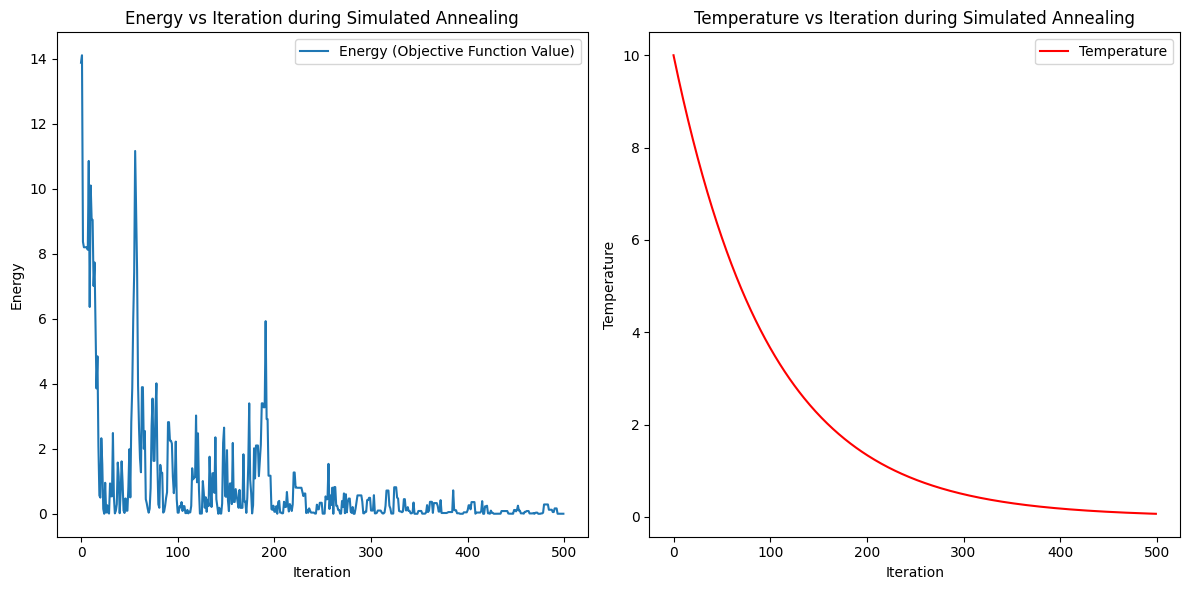

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function to minimize (simple quadratic function: f(x) = x^2)
def objective_function(x):
    """The objective function we aim to minimize. Here, it's a simple quadratic function."""
    return x ** 2

# Metropolis criterion: calculates the probability of accepting a worse solution
def metropolis(current_energy, new_energy, temperature):
    """Decides whether to accept a worse solution based on the Metropolis criterion."""
    # If the new solution is better (lower energy), always accept it
    if new_energy < current_energy:
        return 1  # Always accept if the new solution is better

    # If the new solution is worse, accept it with a probability based on temperature
    else:
        # The probability decreases as the temperature lowers and as the solution worsens
        return np.exp(-(new_energy - current_energy) / temperature)

# Simulated Annealing Process: iteratively improve the solution
def simulated_annealing(start_temp, end_temp, cooling_rate, max_iterations):
    """Performs simulated annealing to minimize an objective function."""
    # Start with a random solution in the range of [-10, 10]
    current_temperature = start_temp
    current_state = np.random.uniform(-10, 10)  # Random start position for the solution
    current_energy = objective_function(current_state)  # Energy (cost) of the current state

    # To track the progress of the algorithm
    energies = []  # List to store the energy at each iteration
    states = []  # List to store the state (solution) at each iteration
    temperatures = []  # List to track the temperature at each iteration

    # Iterate for a set number of times or until the temperature is low enough
    for iteration in range(max_iterations):
        # Generate a neighboring state by making a small random change
        new_state = current_state + np.random.uniform(-1, 1)  # Random move in the solution space
        new_energy = objective_function(new_state)  # Energy (cost) of the new state

        # Calculate the probability of accepting the new state using the Metropolis criterion
        acceptance_probability = metropolis(current_energy, new_energy, current_temperature)

        # Decide whether to move to the new state based on the probability
        if np.random.rand() < acceptance_probability:
            # Accept the new state if the random number is less than the acceptance probability
            current_state = new_state
            current_energy = new_energy  # Update the energy of the current state

        # Store the state, energy, and temperature for plotting later
        energies.append(current_energy)
        states.append(current_state)
        temperatures.append(current_temperature)

        # Gradually reduce the temperature according to the cooling schedule
        current_temperature *= cooling_rate

    return states, energies, temperatures

# Parameters for the annealing process
start_temperature = 10.0  # Initial high temperature
end_temperature = 0.1  # Minimum temperature
cooling_rate = 0.99  # Cooling rate (temperature reduction factor)
max_iterations = 500  # Maximum number of iterations (steps)

# Run the Simulated Annealing algorithm
states, energies, temperatures = simulated_annealing(start_temperature, end_temperature, cooling_rate, max_iterations)

# Plotting the results to visualize the process

plt.figure(figsize=(12, 6))

# Plot 1: Energy (Objective Function Value) vs Iteration
plt.subplot(1, 2, 1)
plt.plot(energies, label="Energy (Objective Function Value)")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.title("Energy vs Iteration during Simulated Annealing")
plt.legend()

# Plot 2: Temperature vs Iteration
plt.subplot(1, 2, 2)
plt.plot(temperatures, label="Temperature", color="red")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.title("Temperature vs Iteration during Simulated Annealing")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()